In [2]:
# imports, Python packages
import matplotlib.pyplot as plt
import random

# imports, same directory
from ch05_statistics import daily_minutes_good
from ch05_statistics import num_friends_good
from ch08_gradient_descent import minimize_stochastic
from ch14_simple_linear_regression import error
from ch14_simple_linear_regression import least_squares_fit

# Simple Linear Regression

The simple linear regression model hypothesize a linear model with **one** independent variable. 

The simple linear regression model assumes that:

y<sub>i</sub> = α + βx<sub>i</sub> + ε<sub>i</sub>

## The Model

The output of the model is:

y<sub>i</sub> = α + βx<sub>i</sub> + ε<sub>i</sub>

The *least squares solution* is to choose the alpha (α) and beta (β) that make *sum_of_squared_errors* as small as possible.



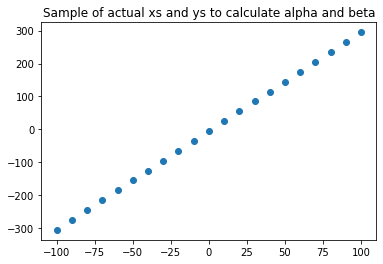

In [3]:
# x-axis and y-axis values
xs = [i for i in range(-100, 110, 10)]
ys = [3 * i - 5 for i in xs]

# generate scatter plot
plt.scatter(xs, ys)

# labels, title and show
plt.title("Sample of actual xs and ys to calculate alpha and beta")
plt.show()


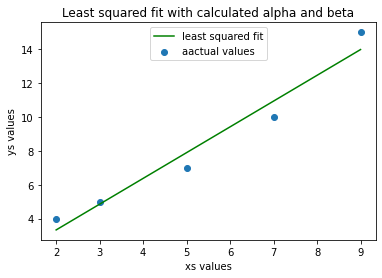

In [7]:
# x-axis values
#xs_actual = [i for i in range(-100, 110, 10)]                              # ordered sequence of numbers
xs_actual = [2, 3, 5, 7, 9]     # daily hours of sunshine

# y-axis values, here we pretend these are real actual values
#ys_actual = [random.uniform(-0.1, 0.1) * (3 * i - 5) for i in xs_actual]   # random numbers above/below a line
ys_actual = [4, 5, 7, 10, 15]   # ice creams sold

# calculate alpha and beta for least squares fit
alpha, beta = least_squares_fit(xs_actual, ys_actual)

# y-axis values, predicted values based on the estimated alpha/beta
ys_least_squares_fit = [beta * i + alpha for i in xs_actual]

# generate scatter plot with the real values
plt.scatter(xs_actual, ys_actual, label='aactual values')

# create a line chart with the least squared fit estimated values
#plt.plot(xs_actual, ys_actual, 'b-', label='actual values')
plt.plot(xs_actual, ys_least_squares_fit, 'g-', label='least squared fit')

# labels, title and show
plt.legend(loc=9)       # loc=9 means "upper centre"
plt.xlabel("xs values")
plt.ylabel("ys values")
plt.title("Least squared fit with calculated alpha and beta")
plt.show()

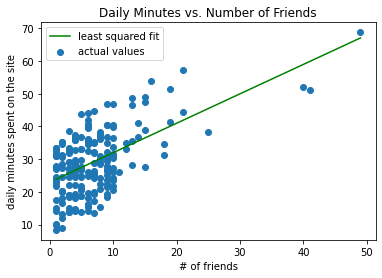

The least squares fit model indicates an alpha of: 22.977 and an beta (slope) of: 0.899


In [8]:
# x-axis values
#xs_actual = [i for i in range(-100, 110, 10)]
xs_actual = num_friends_good

# y-axis values
ys_actual = daily_minutes_good

# calculate alpha and beta for least squares fit
alpha, beta = least_squares_fit(xs_actual, ys_actual)

# y-axis values, predicted values based on the estimated alpha/beta
ys_least_squares_fit = [beta * i + alpha for i in xs_actual]

# generate scatter plot with the real values
plt.scatter(xs_actual, ys_actual, label='actual values')

# create a line chart with the least squared fit estimated values
#plt.plot(xs_actual, ys_actual, 'b-', label='actual values')
plt.plot(xs_actual, ys_least_squares_fit, 'g-', label='least squared fit')

# labels, title and show
plt.legend(loc=2)       # loc=2 means "upper left"
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

print("The least squares fit model indicates an alpha of: " + str(alpha) + 
      " and an beta (slope) of: " + str(beta))

### Model quality

The ***coefficient of determination (or R-squared)*** measures the fraction of the total variation in the dependent variable that is captured by the model.

The higher the number, the better our model fits the data.
0 <= R-squared <= 1


## Using Gradient Descent 

In [10]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),          # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i]    # beta partial derivative

# choose random value to start
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good,
                                  theta,
                                  0.0001)
print('using gradient descent, alpha (α) is:', round(alpha, 2), 'and beta (β) is:', round(beta, 2))

using gradient descent, alpha (α) is: 0.84 and beta (β) is: 0.76
